Dataset:

This dataset is manually collected from observations. It helps us to build machine learning models to predict the quality of milk. This dataset consists of 7 independent variables ie pH, Temperature, Taste, Odor, Fat, Turbidity, and Color.

**pH:** This feature defines pH of the milk, which is in the range of 3 to 9.5.

**temperature:** This feature defines the temperature of the milk, and its range is from 34'C to 90'C.

**taste:** This feature defines the taste of the milk and takes the possibles values: 1 (good) or 0 (bad).

**odor:** This feature defines the odor of the milk and takes the possibles values: 1 (good) or 0 (bad).

**fat:** This feature defines fat of the milk and takes the possibles values: 1 (good) or 0 (bad).

**turbidity:** This feature defines the turbidity of the milk and takes the possibles values: 1 (good) or 0 (bad).

**colour:** This feature defines the color of the milk, which is in the range of 240 to 255.

**grade:** This is the target and takes the values: low_quality, medium_quality, or high_quality.

In [3]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
import seaborn as sns; sns.set()

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler,MinMaxScaler,PowerTransformer
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn import set_config

In [6]:
from sklearn.ensemble import AdaBoostClassifier as ada

In [7]:
dataset = pd.read_csv("/kaggle/input/milkquality/milknew.csv")

In [8]:
dataset.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


In [9]:
dataset.shape

(1059, 8)

In [10]:
dataset.columns

Index(['pH', 'Temprature', 'Taste', 'Odor', 'Fat ', 'Turbidity', 'Colour',
       'Grade'],
      dtype='object')

NOTE - There is a space in column named "Fat  "

In [11]:
dataset.columns = ['pH', 'Temprature', 'Taste', 'Odor', 'Fat', 'Turbidity', 'Colour',
       'Grade']

In [12]:
dataset.columns

Index(['pH', 'Temprature', 'Taste', 'Odor', 'Fat', 'Turbidity', 'Colour',
       'Grade'],
      dtype='object')

In [13]:
dataset.dtypes

pH            float64
Temprature      int64
Taste           int64
Odor            int64
Fat             int64
Turbidity       int64
Colour          int64
Grade          object
dtype: object

All features dtypes are integers except "pH" values are float, "Grade" values are object.

In [14]:
dataset.isnull().sum()

pH            0
Temprature    0
Taste         0
Odor          0
Fat           0
Turbidity     0
Colour        0
Grade         0
dtype: int64

In [15]:
dataset.describe()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,6.630123,44.226629,0.546742,0.432483,0.671388,0.491029,251.840415
std,1.399679,10.098364,0.498046,0.495655,0.469930,0.500156,4.307424
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000
25%,6.500000,38.000000,0.000000,0.000000,0.000000,0.000000,250.000000
50%,6.700000,41.000000,1.000000,0.000000,1.000000,0.000000,255.000000
75%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000
max,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000


Text(0.5, 1.0, 'pH')

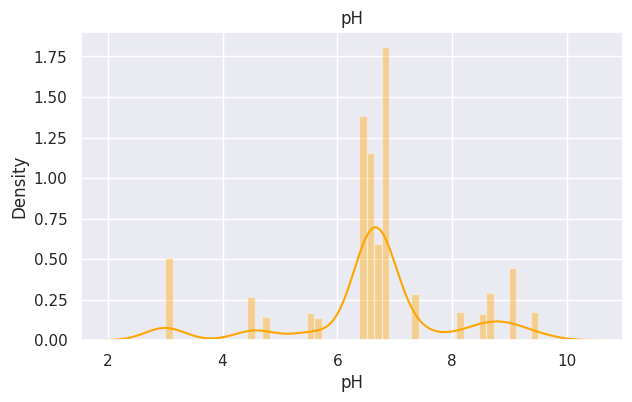

In [16]:
plt.figure(figsize=(7,4))
sns.distplot(dataset['pH'], color="orange").set_title('pH')

Some preliminary observations:

Milk with higher and lower pH values seem to have low quality

All values are positive in range(3.0: 9.5)

Majority - 6.7

Text(0.5, 1.0, 'Temprature')

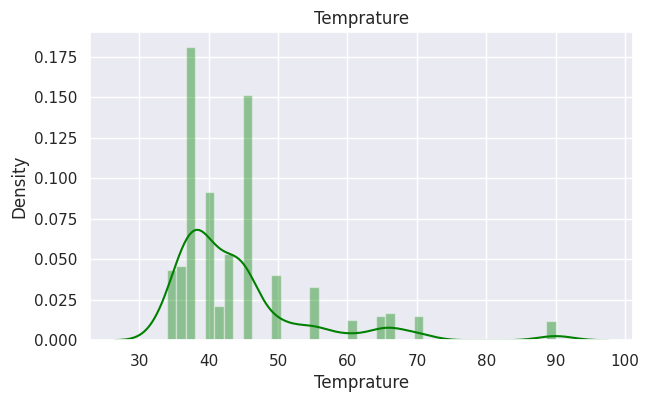

In [17]:
plt.figure(figsize=(7,4))
sns.distplot(dataset['Temprature'], color="green").set_title('Temprature')

All values are positive and temperature in range(34.0: 90.0)
Majority of degrees - 45.0

Text(0.5, 1.0, 'Colour')

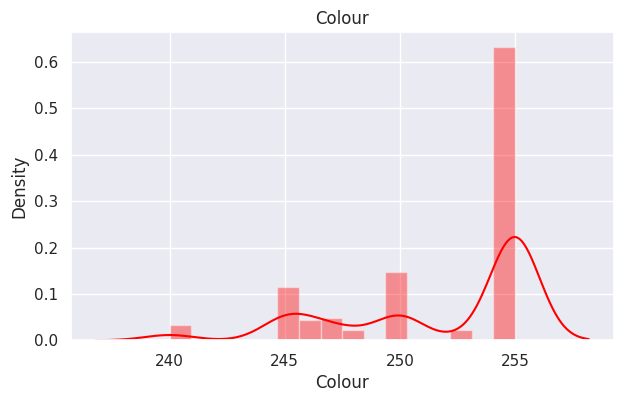

In [18]:
plt.figure(figsize=(7,4))
sns.distplot(dataset['Colour'], color="red").set_title('Colour')

All values are in range(240.0: 255.0)

Majority - 255.0

In [19]:
dataset['Taste'].value_counts()

Taste
1    579
0    480
Name: count, dtype: int64

<Axes: title={'center': 'Taste'}, ylabel='count'>

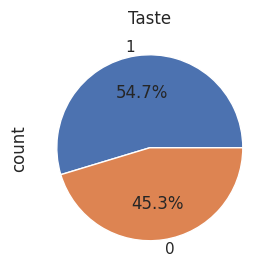

In [20]:
plt.figure(1, figsize=(3,4))
plt.title("Taste")
dataset['Taste'].value_counts().plot.pie(autopct="%1.1f%%")

There are samples with bad taste but classified as high quality (interesting)

In [21]:
dataset['Odor'].value_counts()

Odor
0    601
1    458
Name: count, dtype: int64

<Axes: title={'center': 'Odor'}, ylabel='count'>

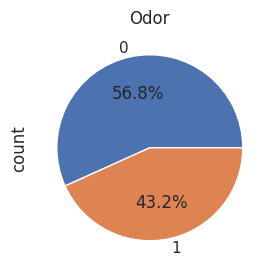

In [22]:
plt.figure(1, figsize=(3,4))
plt.title("Odor")
dataset['Odor'].value_counts().plot.pie(autopct="%1.1f%%")

In [23]:
dataset['Fat'].value_counts()

Fat
1    711
0    348
Name: count, dtype: int64

<Axes: title={'center': 'Fat'}, ylabel='count'>

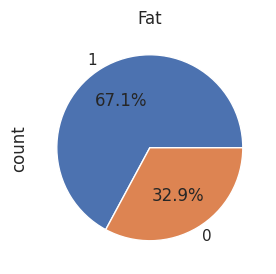

In [24]:
plt.figure(1, figsize=(3,4))
plt.title("Fat")
dataset['Fat'].value_counts().plot.pie(autopct="%1.1f%%")

In [25]:
dataset["Turbidity"].value_counts()

Turbidity
0    539
1    520
Name: count, dtype: int64

<Axes: title={'center': 'Turbidity'}, ylabel='count'>

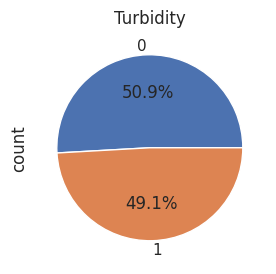

In [26]:
plt.figure(1, figsize=(3,4))
plt.title("Turbidity")
dataset["Turbidity"].value_counts().plot.pie(autopct="%1.1f%%")

In [27]:
dataset['Grade'].value_counts()

Grade
low       429
medium    374
high      256
Name: count, dtype: int64

There are three classes: high, medium, low

"High" count is the least with ratio 24.2%

<Axes: title={'center': 'Grade'}, ylabel='count'>

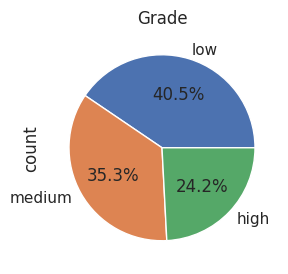

In [28]:
plt.figure(1, figsize=(3,4))
plt.title("Grade")
dataset['Grade'].value_counts().plot.pie(autopct="%1.1f%%")

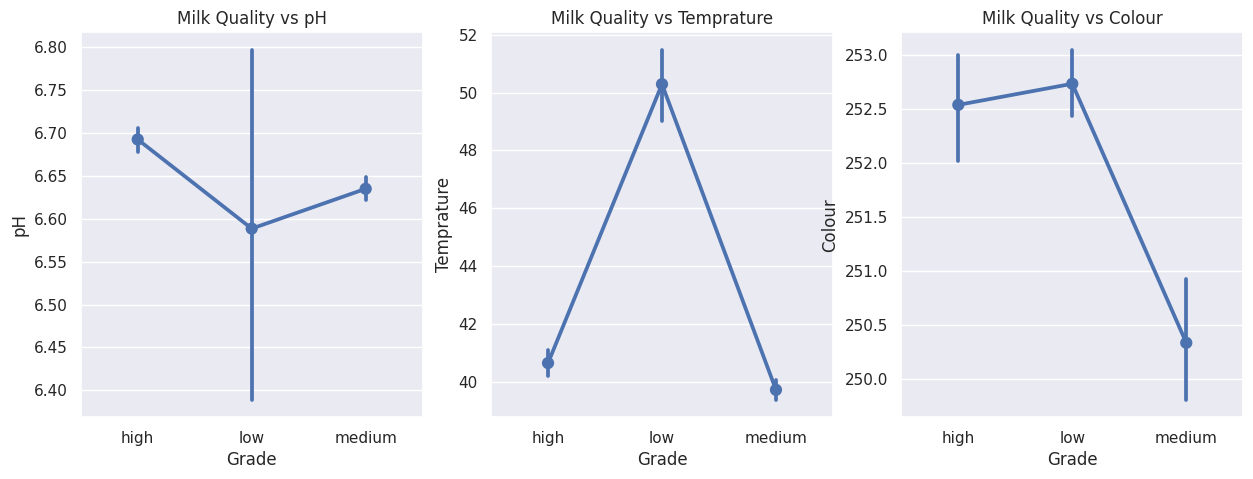

In [29]:
ContinousColumns = ['pH', 'Temprature', 'Colour']

fig = plt.figure(figsize=(15,5))

for i in range(len(ContinousColumns)):
    plt.subplot(1,3,i+1)
    plt.title("Milk Quality vs " + ContinousColumns[i])
    sns.pointplot(data=dataset,y=dataset[ContinousColumns[i]],x=dataset['Grade'])

Milk quality is medium to high if pH in range (6.59: 6.67)

If temperature increases milk Quality decreases

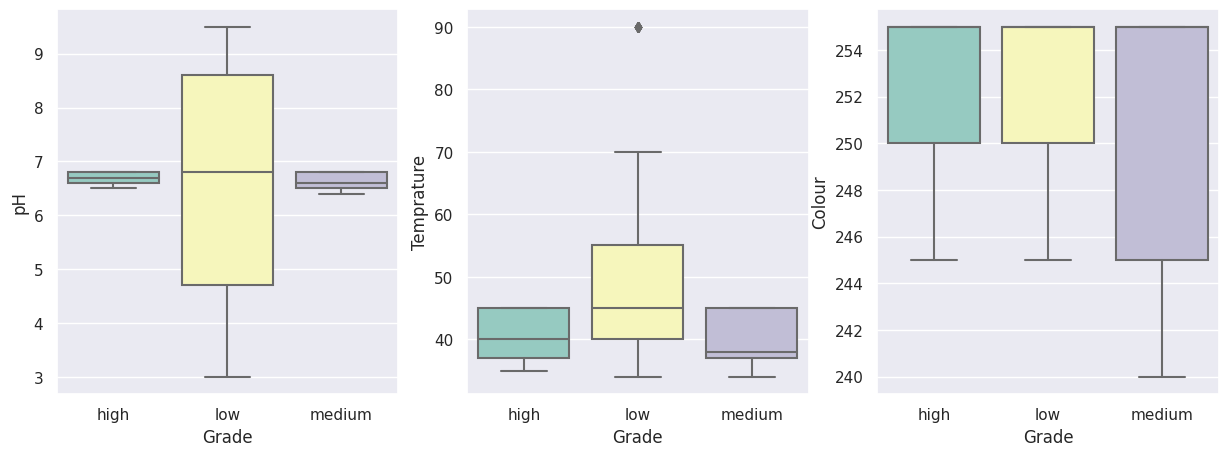

In [30]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
for var, subplot in zip(ContinousColumns, ax.flatten()):
    sns.boxplot(x='Grade', y=var, data=dataset, ax=subplot, palette='Set3')


*   pH value must be kept in a certain interval at least for medium quality
*   Higher temperatures could result in low quality
*   Color is not a very good feature to distinguish high and low quality milk




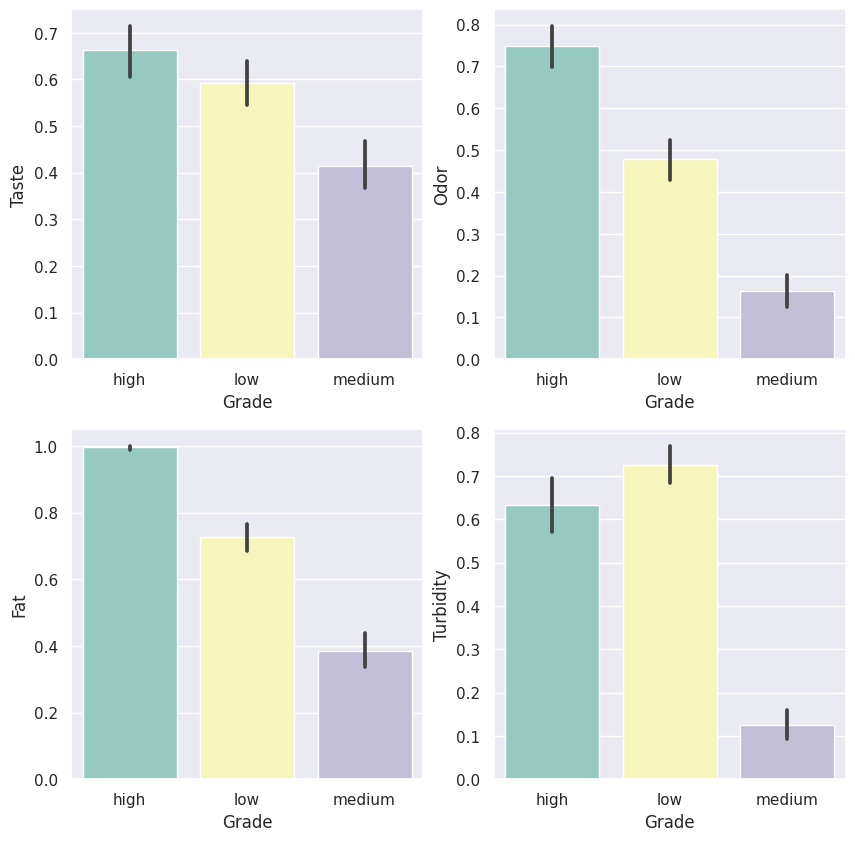

In [31]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
binary_features = ['Taste', 'Odor', 'Fat', 'Turbidity']
for var, subplot in zip(binary_features, ax.flatten()):
    sns.barplot(x='Grade', y= var, data=dataset, ax=subplot, palette='Set3')

Observations:


*   Good taste average is higher at high-quality samples
*   Fat is necessary for high-quality milk but it is not sufficient
*   Odor average is higher at high-quality samples (People like smelly milk)
*   Turbidity could lead low-quality risk


In [32]:
target = dataset["Grade"]
data = dataset.drop(["Grade"],axis=1)

In [33]:
encoder = LabelEncoder()
target = encoder.fit_transform(target)
print(pd.Series(target).unique())

[0 1 2]


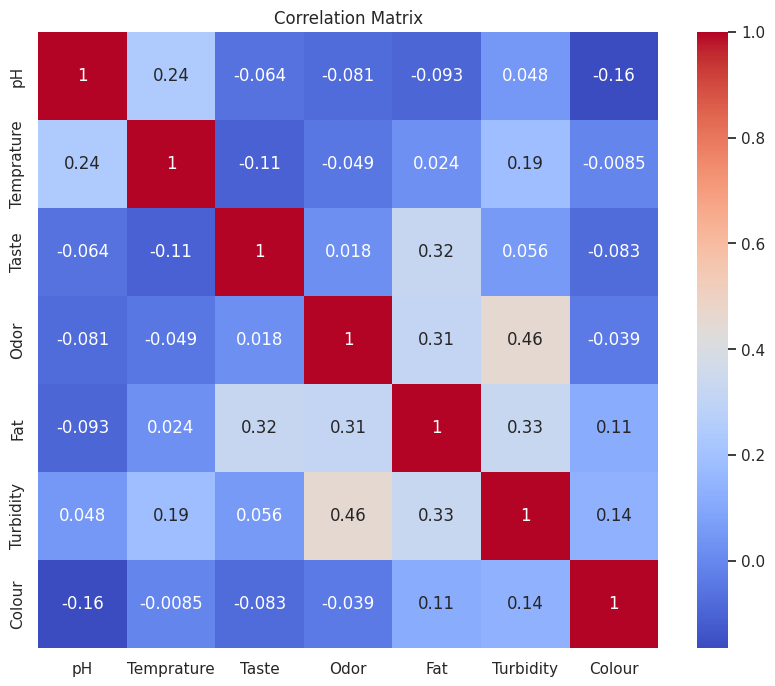

In [34]:
corr_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

We have a good correlation between temperature and quality grade. But wait a minute... Why are the other correlations seem so low?

Because it's a horrible idea to look for correlation for a classification problem. Correlation is good at measuring linear relationships. And we are asking to measure the relationship between continuous to discrete or discrete to discrete variables.

I will use mutual information to measure the relationship between features and the target variable. Before doing it, let's separate the target from the data set.

In [35]:
# determine the mutual information
from sklearn.feature_selection import mutual_info_regression
mutual_info = mutual_info_regression(data, target, random_state=42)

mutual_info = pd.Series(mutual_info)
mutual_info.index = data.columns
pd.DataFrame(mutual_info.sort_values(ascending=False), columns = ["Mutual_Information"] ).style.background_gradient("cool")

,Mutual_Information
pH,0.523303
Temprature,0.407415
Colour,0.196555
Turbidity,0.168556
Fat,0.125990
Odor,0.094475
Taste,0.011023


pH and Temperature will make a really good job at predictions. The others are also have significant mutual information scores.

First: Some algorithms need feature scaling for better accuracy and faster convergence(Specifically distance-based algorithms like KNN and support vector machine, and any other algorithm that uses gradient descent like ANN). That is why we need to scale continuous features for them.

Second: Skewness in the data set could affect the algorithm's performance. We will identify and handle skewed features.

Note: Now data is not in a fixed range so feature scaling is needed for the contours will look more like circles and gradient descent can find a much more direct path.

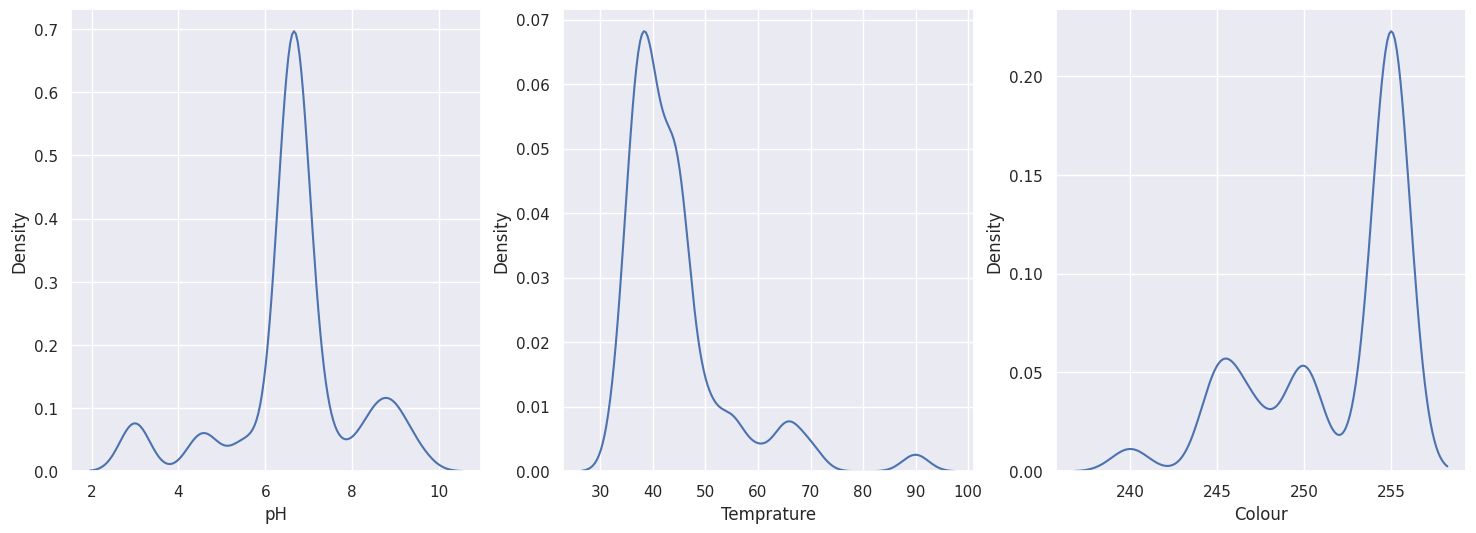

In [36]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
for var, subplot in zip(ContinousColumns, ax.flatten()):
    sns.kdeplot(x= var, data=dataset, ax=subplot, palette='Set3')

Temperature is right-skewed color is left-skewed.

In [37]:
#Looking skewness more quantitative way
skew_features = dataset[ContinousColumns].skew().sort_values(ascending=False)
skew_features = pd.DataFrame({'Skew' : skew_features})
skew_features.style.background_gradient('rocket')

,Skew
Temprature,2.216739
pH,-0.683904
Colour,-1.024902


In [38]:
#skewed and non-skewed features
skewed_features = ['Temprature', 'Colour']
non_skewed_feature = ['pH']

Sklearn has many useful functions for preprocessing. We can use PowerTransformer to get rid of skewness. PowerTransformer also has standardize argument. We can set it to True to accomplish our second task: scaling.

In [39]:
skewness_transformer = Pipeline(steps=[
    ('PowerTransformer', PowerTransformer( method='yeo-johnson', standardize=True)),
])

Let's create an other piece to handle our tiny feature pH which is not skewed. Only scaling will be sufficient for it

In [40]:
# Standardize features
numerical_transformer = Pipeline(steps=[
    ('Scaler', StandardScaler()),
])

In [41]:
# Bundle preprocessing
preprocessor = ColumnTransformer(remainder='passthrough',
    transformers=[
        ('skewness_transformer', skewness_transformer, skewed_features),
        ('numerical_transformer', numerical_transformer, non_skewed_feature)
    ])
set_config(display="diagram")
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('skewness_transformer',
                                 Pipeline(steps=[('PowerTransformer',
                                                  PowerTransformer())]),
                                 ['Temprature', 'Colour']),
                                ('numerical_transformer',
                                 Pipeline(steps=[('Scaler', StandardScaler())]),
                                 ['pH'])])

In [42]:
#scaler = MinMaxScaler()
#scaler = StandardScaler()
#data = scaler.fit_transform(data)
#print(data.min())
#print(data.max())
#print(data)

In [43]:
x_train,x_test,y_train,y_test = train_test_split(data,target,test_size=0.2,random_state=0,shuffle=True,
                                                    stratify=target)
print(f'whole dataset: {len(data)}')
print(f'train sample: {len(x_train)}')
print(f'test sample: {len(x_test)}')

whole dataset: 1059
train sample: 847
test sample: 212


In [44]:
model = RandomForestClassifier()
model.fit(x_train,y_train)
print("Training Accuracy ",model.score(x_train,y_train)*100)
print("Test Accuracy ",model.score(x_test,y_test)*100)

Training Accuracy  100.0
Test Accuracy  98.58490566037736


In [48]:
cvs = cross_val_score(model,data,target,cv=5)
print(cvs)
print(cvs.mean())

[0.99056604 1.         1.         1.         0.99052133]
0.9962174729500134


In [45]:
random_state = 1

In [46]:
Xgb_model = XGBClassifier(random_state = random_state).fit(x_train, y_train)
train_accuracy = round(Xgb_model.score(x_train, y_train)*100,2)
print("Training Accuracy: % {}".format(train_accuracy))
test_accuracy = round(Xgb_model.score(x_test,y_test)*100,2)
print("Testing Accuracy: % {}".format(test_accuracy))

Training Accuracy: % 100.0
Testing Accuracy: % 98.58


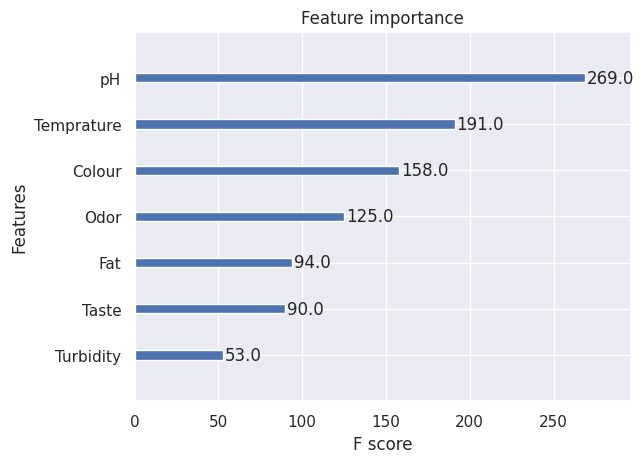

In [47]:
from xgboost import plot_importance
plot_importance(Xgb_model);

pH and Temperature are the most important features. This is very similar to what mutual information was said.

In [48]:
from sklearn.neighbors import KNeighborsClassifier
test_acc=[]
train_acc=[]

for i in range(1,15):
  knn = KNeighborsClassifier(i)
  knn.fit(x_train,y_train)
  train_acc.append(knn.score(x_train,y_train))
  test_acc.append(knn.score(x_test,y_test))

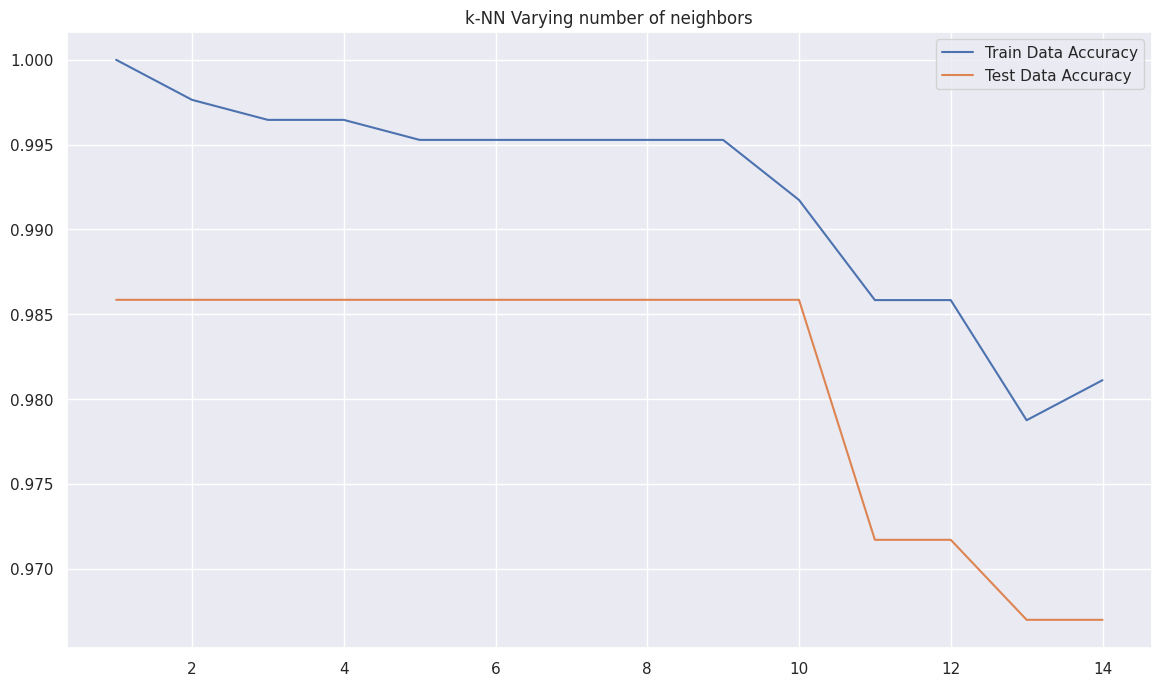

In [49]:
plt.figure(figsize=(14,8))
plt.title('k-NN Varying number of neighbors')
sns.lineplot(x=range(1,15),y=train_acc,label='Train Data Accuracy')
sns.lineplot(x=range(1,15),y=test_acc,label='Test Data Accuracy')
plt.show()

In [50]:
knn = KNeighborsClassifier(4)
model = knn.fit(x_train,y_train)

In [51]:
model.score(x_train,y_train)*100

99.64580873671783

In [52]:
model.score(x_test,y_test)*100

98.58490566037736

In [53]:
cvs = cross_val_score(model,data,target,cv=5)
print(cvs)
print(cvs.mean())

[0.98584906 1.         0.99056604 1.         0.98104265]
0.9914915496736117


In [54]:
clf = DecisionTreeClassifier(random_state=random_state)

In [55]:
search_space = {
    'criterion' : ['gini', 'entropy'],
    'max_depth': [4,5,6,7,8,9]
}

In [56]:
gs_dtc = GridSearchCV(estimator=clf,
                  param_grid=search_space,
                  scoring = ['accuracy','precision','recall','f1','matthews_corrcoef'],
                  refit = 'accuracy',
                  cv=5,
                  )
gs_dtc.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9]},
             refit='accuracy',
             scoring=['accuracy', 'precision', 'recall', 'f1',
                      'matthews_corrcoef'])

In [ ]:
import sklearn
sklearn.metrics.get_scorer_names()

In [57]:
gs_dtc.best_estimator_

DecisionTreeClassifier(max_depth=9, random_state=1)

In [58]:
X_train_prediction = gs_dtc.best_estimator_.predict(x_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)
print('Accuracy on Training data : ', training_data_accuracy)

X_test_prediction = gs_dtc.best_estimator_.predict(x_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy on Training data :  0.9929161747343566
Accuracy score on Test Data :  0.9716981132075472


In [59]:
cvs = cross_val_score(gs_dtc.best_estimator_,data,target,cv=5)
print(cvs)
print(cvs.mean())

[0.96698113 0.98584906 0.98113208 0.98584906 0.97630332]
0.9792229276580523


In [60]:
classifier = SVC(kernel='linear', random_state=0)

In [61]:
search_space = {
    'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [1,2,3,4],
    'gamma': ['scale', 'auto'],
    'probability': [True,False]
}

In [62]:
gs_svc = GridSearchCV(estimator=classifier,
                  param_grid=search_space,
                  scoring = ['accuracy','precision','recall','f1'],
                  refit = 'accuracy',
                  cv=5,

                 )
gs_svc.fit(x_train,y_train)


GridSearchCV(cv=5, estimator=SVC(kernel='linear', random_state=0),
             param_grid={'degree': [1, 2, 3, 4], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                         'probability': [True, False]},
             refit='accuracy',
             scoring=['accuracy', 'precision', 'recall', 'f1'])

In [63]:
gs_svc.best_estimator_

SVC(degree=4, gamma='auto', kernel='poly', probability=True, random_state=0)

In [64]:
X_train_prediction = gs_svc.best_estimator_.predict(x_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)
print('Accuracy on Training data : ', training_data_accuracy)

X_test_prediction = gs_svc.best_estimator_.predict(x_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)
print('Accuracy score on Test Data : ', test_data_accuracy)


Accuracy on Training data :  0.9598583234946871
Accuracy score on Test Data :  0.9198113207547169


In [1]:
cvs = cross_val_score(gs_svc.best_estimator_,data,target,cv=5)
print(cvs)
print(cvs.mean())

NameError: name 'cross_val_score' is not defined

In [65]:
r_model=RandomForestClassifier()

In [66]:
search_space = {
    'n_estimators' : [100,200,300,400,500,600],
    'criterion': ['gini', 'entropy'],
    'max_depth': [2,3,4,5,6,7,8,9],
}

In [68]:
gs_rfc = GridSearchCV(estimator=r_model,
                  param_grid=search_space,
                  scoring = ['accuracy','precision','recall','f1'],
                  refit = 'accuracy',
                  cv=5,

                 )
gs_rfc.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9],
                         'n_estimators': [100, 200, 300, 400, 500, 600]},
             refit='accuracy',
             scoring=['accuracy', 'precision', 'recall', 'f1'])

In [69]:
gs_rfc.best_estimator_

RandomForestClassifier(max_depth=6)

In [70]:
X_train_prediction = gs_rfc.best_estimator_.predict(x_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)
print('Accuracy on Training data : ', training_data_accuracy)

X_test_prediction = gs_rfc.best_estimator_.predict(x_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy on Training data :  1.0
Accuracy score on Test Data :  0.9858490566037735


In [71]:
clf_ada = ada(estimator=gs_rfc.best_estimator_,n_estimators=200, algorithm="SAMME.R", random_state=random_state)
clf_ada.fit(x_train, y_train)

AdaBoostClassifier(estimator=RandomForestClassifier(max_depth=6),
                   n_estimators=200, random_state=1)

In [72]:
X_train_prediction = clf_ada.predict(x_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)
print('Accuracy on Training data : ', training_data_accuracy)

X_test_prediction = clf_ada.predict(x_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy on Training data :  1.0
Accuracy score on Test Data :  0.9858490566037735


In [73]:
SVC_pipe = Pipeline(steps=[
                       ('preprocessor', preprocessor),
                      ('regressor1', gs_svc.best_estimator_),
                     ])
SVC_pipe

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('skewness_transformer',
                                                  Pipeline(steps=[('PowerTransformer',
                                                                   PowerTransformer())]),
                                                  ['Temprature', 'Colour']),
                                                 ('numerical_transformer',
                                                  Pipeline(steps=[('Scaler',
                                                                   StandardScaler())]),
                                                  ['pH'])])),
                ('regressor1',
                 SVC(degree=4, gamma='auto', kernel='poly', probability=True,
                     random_state=0))])

In [74]:
KNN_pipe = Pipeline(steps=[
                       ('preprocessor', preprocessor),
                      ('regressor1', KNeighborsClassifier()),
                     ])
KNN_pipe

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('skewness_transformer',
                                                  Pipeline(steps=[('PowerTransformer',
                                                                   PowerTransformer())]),
                                                  ['Temprature', 'Colour']),
                                                 ('numerical_transformer',
                                                  Pipeline(steps=[('Scaler',
                                                                   StandardScaler())]),
                                                  ['pH'])])),
                ('regressor1', KNeighborsClassifier())])

In [75]:
ANN_pipe = Pipeline(steps=[
                       ('preprocessor', preprocessor),
                      ('regressor1', MLPClassifier(hidden_layer_sizes=(20, 15, 10), activation='relu', batch_size=10, max_iter=50,random_state =random_state)),
                     ])
ANN_pipe

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('skewness_transformer',
                                                  Pipeline(steps=[('PowerTransformer',
                                                                   PowerTransformer())]),
                                                  ['Temprature', 'Colour']),
                                                 ('numerical_transformer',
                                                  Pipeline(steps=[('Scaler',
                                                                   StandardScaler())]),
                                                  ['pH'])])),
                ('regressor1', MLPClassifier(random_state=1))])

Classification Report of DT:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95        51
           1       1.00      0.97      0.98        86
           2       0.99      0.96      0.97        75

    accuracy                           0.97       212
   macro avg       0.97      0.98      0.97       212
weighted avg       0.97      0.97      0.97       212

Confusion Matrix of DT:



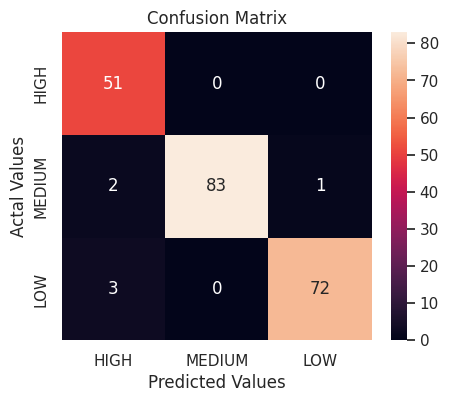

Classification Report of SVM:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86        51
           1       1.00      0.93      0.96        86
           2       0.86      0.93      0.90        75

    accuracy                           0.92       212
   macro avg       0.91      0.91      0.91       212
weighted avg       0.92      0.92      0.92       212

Confusion Matrix of SVM:



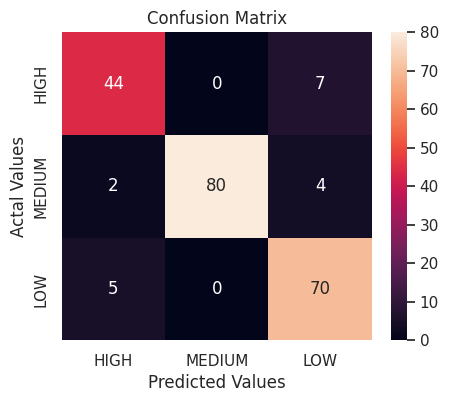

Classification Report of ANN:
               precision    recall  f1-score   support

           0       0.88      1.00      0.94        51
           1       1.00      0.97      0.98        86
           2       1.00      0.95      0.97        75

    accuracy                           0.97       212
   macro avg       0.96      0.97      0.96       212
weighted avg       0.97      0.97      0.97       212

Confusion Matrix of ANN:



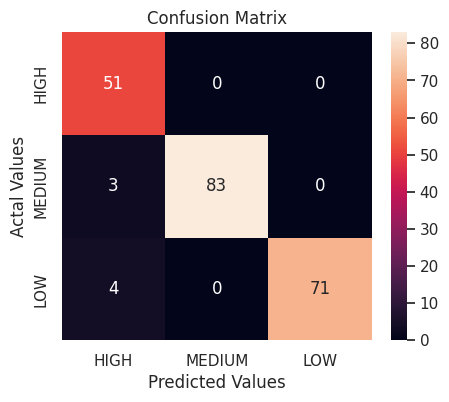

Classification Report of RF:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97        51
           1       1.00      0.97      0.98        86
           2       1.00      1.00      1.00        75

    accuracy                           0.99       212
   macro avg       0.98      0.99      0.98       212
weighted avg       0.99      0.99      0.99       212

Confusion Matrix of RF:



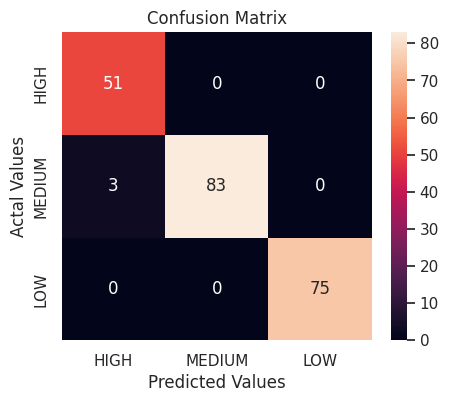

Classification Report of GBM:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97        51
           1       1.00      0.97      0.98        86
           2       0.99      0.99      0.99        75

    accuracy                           0.98       212
   macro avg       0.98      0.98      0.98       212
weighted avg       0.98      0.98      0.98       212

Confusion Matrix of GBM:



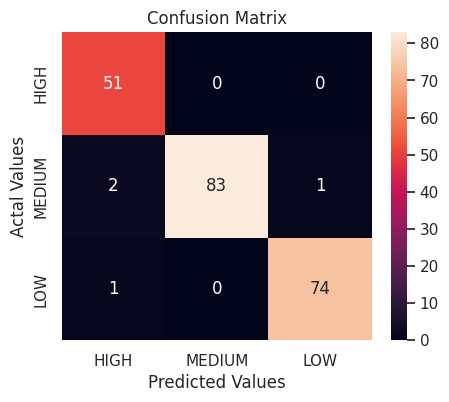

Classification Report of XGB:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97        51
           1       1.00      0.97      0.98        86
           2       1.00      1.00      1.00        75

    accuracy                           0.99       212
   macro avg       0.98      0.99      0.98       212
weighted avg       0.99      0.99      0.99       212

Confusion Matrix of XGB:



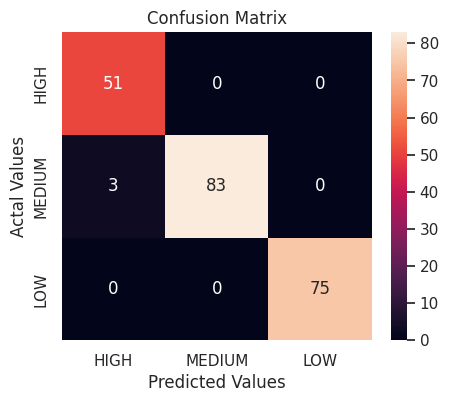

Classification Report of KNN:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97        51
           1       1.00      0.97      0.98        86
           2       1.00      1.00      1.00        75

    accuracy                           0.99       212
   macro avg       0.98      0.99      0.98       212
weighted avg       0.99      0.99      0.99       212

Confusion Matrix of KNN:



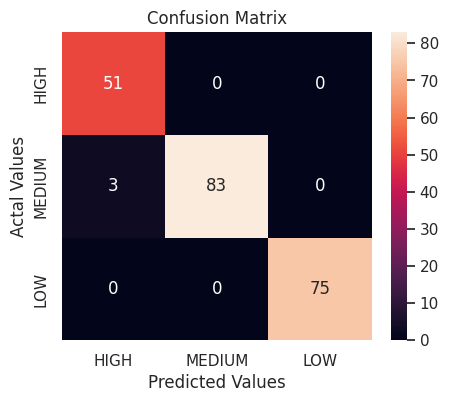

Classification Report of AdaBoost:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97        51
           1       1.00      0.97      0.98        86
           2       1.00      1.00      1.00        75

    accuracy                           0.99       212
   macro avg       0.98      0.99      0.98       212
weighted avg       0.99      0.99      0.99       212

Confusion Matrix of AdaBoost:



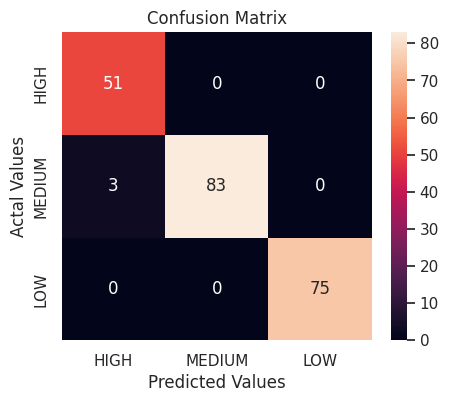

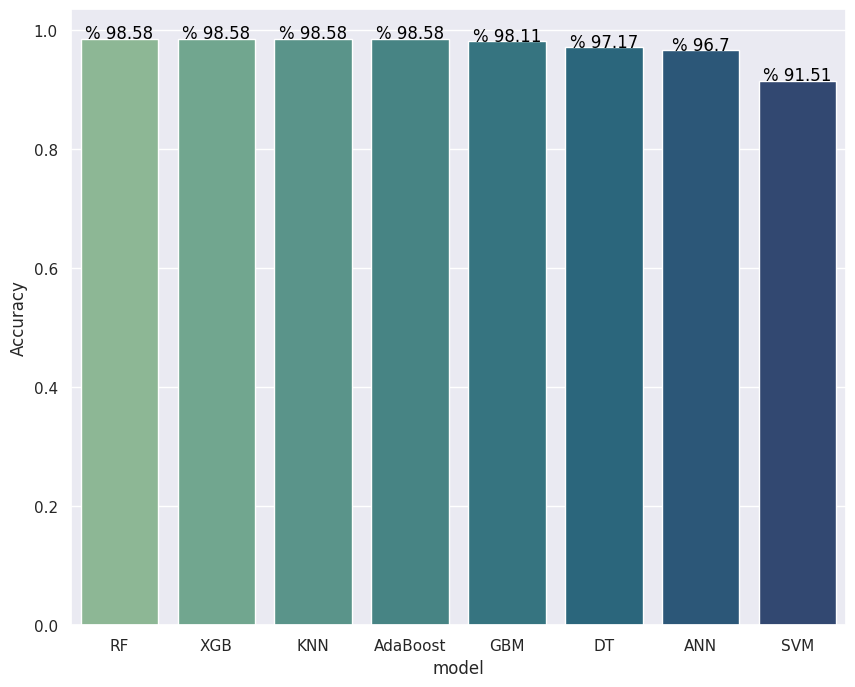

In [81]:
models = []
models.append(('DT', gs_dtc.best_estimator_))
models.append(('SVM', SVC_pipe))
models.append(('ANN', ANN_pipe))
models.append(('RF', gs_rfc.best_estimator_))
models.append(('GBM', GradientBoostingClassifier(random_state = random_state)))
models.append(('XGB', XGBClassifier(random_state = random_state)))
models.append(('KNN', KNN_pipe))
models.append(('AdaBoost',clf_ada))

accT = []
names = []

for name, model in models:
    clf = model.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    accT.append([name, accuracy_score(y_test, y_pred)])
    class_report = classification_report(y_test, y_pred)
    print("Classification Report of {}:\n".format(name), class_report)
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix of {}:\n".format(name))
    cm_df = pd.DataFrame(cm,
                     index = ['HIGH','MEDIUM','LOW'], 
                     columns = ['HIGH','MEDIUM','LOW'])
    plt.figure(figsize=(5,4))
    sns.heatmap(cm_df, annot=True)
    plt.title('Confusion Matrix')
    plt.ylabel('Actal Values')
    plt.xlabel('Predicted Values')
    plt.show()

results = pd.DataFrame(accT, columns = ['model', 'Accuracy'])
groupedvalues = results.sort_values(by = 'Accuracy', ascending = False).reset_index()

plt.figure(figsize=(10,8))
g = sns.barplot(x='model', y='Accuracy', data=groupedvalues, palette = "crest")

for index, row in groupedvalues.iterrows():
    g.text(row.name, row.Accuracy, "% {}".format(round(row.Accuracy*100,2)), color='black', ha="center")
plt.show()